In [13]:
pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip (133.1 MB)
     |████████████████████████████████| 13.0 MB 328 kB/s eta 0:00:01
     |████████████████████████████████| 217 kB 1.4 MB/s eta 0:00:01
  Created wheel for basemap: filename=basemap-1.2.1-cp37-cp37m-macosx_10_15_x86_64.whl size=121669783 sha256=b93b021d63c5fc704802ca7394bbc2cd6f1c144446e31d451bbc229854bd6d71
  Stored in directory: /private/var/folders/xg/mdrmjj9124l7v9bhm8tc04br0000gn/T/pip-ephem-wheel-cache-utw5c7vg/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.2-py3-none-any.whl size=36215 sha256=6067d648a7a5009c9742286d94c5899c6ccd8dc6165f4918d0f1dcce87094277
  Stored in directory: /Users/ayaan/Library/Caches/pip/wheels/fc/5c/43/92beaadf045d95947eee5a8191da4b3bc439d750bb13a3d468
Successfully built basemap pyshp
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt         
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import folium
from folium.plugins import Draw

In [3]:
meteor_data = pd.read_csv('meteorite-landings.csv')
meteor_data = meteor_data[(meteor_data.reclat != 0.0) & (meteor_data.reclong != 0.0)]
#meteor_data.info()
meteor_data.to_csv('mdata_relict.csv')

In [27]:
#nametype = 'relict' are degraded, filter for "valid" 
meteor_valid = meteor_data.groupby('nametype').get_group('Valid').copy()
meteor_valid.dropna(inplace=True)
#meteor_valid.info()
meteor_valid = meteor_valid.reset_index(drop=True)
del meteor_valid['nametype']
meteor_valid.to_csv('mdata.csv')

Text(0.5, 1.0, 'Distribution of meteorites scaled with mass')

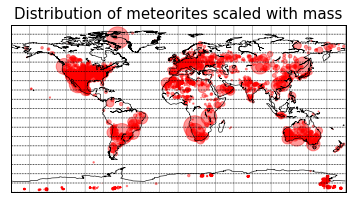

In [28]:
m = Basemap(projection='cyl')
m.drawmapboundary(fill_color='w')
m.drawcoastlines(linewidth=0.6)
m.drawmeridians(range(0, 360, 20),linewidth=0.5)

m.drawparallels(range(-90, 100, 10), linewidth=0.8)
m.scatter(meteor_valid.reclong,meteor_valid.reclat,s=np.sqrt(meteor_valid.mass/250),alpha=0.4,color='r')
plt.title('Distribution of meteorites scaled with mass', fontsize=15)

Text(0.5, 1.0, 'Distribution of meteorites scaled with mass')

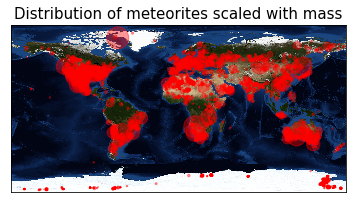

In [29]:
m = Basemap(projection='cyl',
            resolution=None)
m.scatter(meteor_valid.reclong,meteor_valid.reclat,alpha=0.4,s = np.sqrt(meteor_valid.mass/250),color='r',marker="o")
m.bluemarble()
plt.title('Distribution of meteorites scaled with mass', fontsize=15)

In [30]:
meteor_found = meteor_valid.groupby('fall').get_group('Found').copy()
meteor_fell = meteor_valid.groupby('fall').get_group('Fell').copy()

Text(0.5, 1.0, 'Distribution of meteorites fell(observed)')

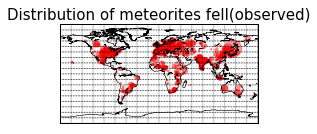

In [31]:
fig = plt.figure()

# ax = fig.add_subplot(211)
# m = Basemap(projection='cyl')
# m.drawmapboundary(fill_color='w')
# m.drawcoastlines(linewidth=0.6)
# m.drawmeridians(range(0, 360, 20),linewidth=0.5)
# m.drawparallels(range(-90, 100, 10), linewidth=0.8)
# m.scatter(meteor_found.reclong,meteor_found.reclat,s=np.sqrt(meteor_found.mass/250),alpha=0.4,color='r')
# plt.title('Distribution of meteorites found(discovered)', fontsize=15)

ax = fig.add_subplot(212)
m = Basemap(projection='cyl')
m.drawmapboundary(fill_color='w')
m.drawcoastlines(linewidth=0.6)
m.drawmeridians(range(0, 360, 20),linewidth=0.5)
m.drawparallels(range(-90, 100, 10), linewidth=0.8)
m.scatter(meteor_fell.reclong,meteor_fell.reclat,s=np.sqrt(meteor_fell.mass/250),alpha=0.4,color='r')
plt.title('Distribution of meteorites fell(observed)', fontsize=15)

In [32]:
m = folium.Map(no_touch = True, zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(meteor_fell)):
    try:
       folium.Circle(
          location=[meteor_fell['reclat'][i], meteor_fell['reclong'][i]],
          #popup=data.iloc[i]['name'],
          radius=np.sqrt(meteor_fell['mass'][i]/250),
          color='crimson',
          fill=True,
          fill_color='crimson'
       ).add_to(m)
    except:
        pass
print("Distribution of observed meteorites")
m

Distribution of observed meteorites


In [33]:
meteor_loc = meteor_valid["GeoLocation"]

In [34]:
# top 15 locations of maximum hits
max_hits = meteor_loc.value_counts()[:15]

In [35]:
m = folium.Map(
    zoom_start=2, 
    no_touch=True)
for key in max_hits.keys():
    pos = eval(key)
    folium.Marker(pos).add_to(m)
print("hotspots/repeated locations")
m

hotspots/repeated locations


In [36]:
primary_classes = {
    "stony": ["CI", "CM", "CO", "CV", "CK", "CR", "CH", "CB", "H", "L", "LL", "E", "OC", "LLL", "HL", "EH", "EL", "R", "K", "ACAPULCOITE", "LODRANITE", "WINONAITE", "HOWARDITE", "EUCRITE", "DIOGENITE", "ANGRITE", "AUBRITE", "UREILITE", "BRACHINITE", "LUNAR", "SHERGOTTITE", "NAKHLITE", "CHASSIGNITE", "MARTIAN", "ACHONDRITE", "CHONDRITE", "RELICTOC"],
    "stony_iron": ["PALLASITE", "MESOSIDERITE"],
    "iron": ["IC", "IIAB", "IIC", "IID", "IIF", "IIG", "IIIAB", "IIIE", "IIIF", "IVA", "IVB", "IAB", "UDEI", "PITTS", "sLL", "sLM", "sLH", "sHL", "sHH", "IIE"]
}

In [37]:
def category(recclass):
    rec_class = "".join(char for char in recclass if char.isalpha()) #for exact match without digits
    if "iron" in rec_class.lower():
        return "iron"
    for key in primary_classes.keys():
        if (rec_class.upper() in primary_classes[key]):
            return key
        for category in primary_classes[key]:
            if (len(category) >= 3 and name in rec_class.upper()):
                return key    
    #if no match
    return "unclassified"

In [38]:
meteor_valid["primary_recclass"] = meteor_valid["recclass"].apply(category)

In [39]:
meteor_valid

,name,id,recclass,mass,fall,year,reclat,reclong,GeoLocation,primary_recclass
0,Aachen,1,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",stony
1,Aarhus,2,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",stony
2,Abee,6,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",stony
3,Acapulco,10,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",stony
4,Achiras,370,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",stony
...,...,...,...,...,...,...,...,...,...,...
31680,Zillah 002,31356,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)",stony
31681,Zinder,30409,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)",unclassified
31682,Zlin,30410,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)",stony
31683,Zubkovsky,31357,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)",stony


In [40]:
meteor_valid.to_csv('mdata_primary.csv')

In [1]:
pip install libtiff


     |████████████████████████████████| 129 kB 998 kB/s eta 0:00:01
  Created wheel for libtiff: filename=libtiff-0.4.2-cp37-cp37m-macosx_10_15_x86_64.whl size=168250 sha256=5eb14e3ecac33e9a821742a930e510838c382a8f438b59240b42caffb5e41b6e
  Stored in directory: /Users/ayaan/Library/Caches/pip/wheels/ea/3d/1d/9ad926b88ecfd8719065c57ad36808810a77123c4647e8d341
Successfully built libtiff
Note: you may need to restart the kernel to use updated packages.
